In [1]:
import cv2
import torch
import torchvision
import numpy as np
import copy
import random
from google.colab import drive
from google.colab.patches import cv2_imshow
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

# print(torchvision.__version__)
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# test_img1 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q1.jpg", cv2.IMREAD_COLOR)
# test_img1 = cv2.resize(test_img1, (800, 600))
# test_img1 = [test_img1, 0.1, 0.5]
# test_img2 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q2.jpg", cv2.IMREAD_COLOR)
# test_img2 = cv2.resize(test_img2, (800, 600))
# test_img2 = [test_img2, 0.2, 0.1]
# test_img3 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q5.jpg", cv2.IMREAD_COLOR)
# test_img3 = cv2.resize(test_img3, (800, 600))
# test_img3 = [test_img3, 0.3, 0.6]
# test_img4 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/q6.jpg", cv2.IMREAD_COLOR)
# test_img4 = cv2.resize(test_img4, (800, 600))
# test_img4 = [test_img4, 0.4, 0.3]
# heart_img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/image/heart_heart.jpg", cv2.IMREAD_COLOR)
# heart_img = cv2.resize(heart_img, (800, 600))

In [2]:
q1 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_data0.npy", allow_pickle=True)
q2 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_data1.npy", allow_pickle=True)
q3 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_data2.npy", allow_pickle=True)
q4 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test_data3.npy", allow_pickle=True)
q5 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/bts_thumb_imgs.npy", allow_pickle=True)
q6 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/small_thumb_imgs.npy", allow_pickle=True)
q7 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/testdata0_mbestidx1_output.npy", allow_pickle=True)
q8 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test10_drawing_thumb_23.npy", allow_pickle=True)
q9 = np.load("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/test11_shopping_thumb_29.npy", allow_pickle=True)


# q1 : 목공 + 요리 + 강아지 + 고양이
# q2 : 목공 + 강아지
# q3 : 요리
# q4 : 여행 + 고양이
# q5 : 목공
# q6 : 여행
# q7 : ??

In [3]:
print("len(q1) :", len(q2))
print("len(q2) :", len(q3))
print("len(q3) :", len(q4))
print("len(q4) :", len(q5))
print("len(q6) :", len(q6))
print("len(q7) :", len(q7))
print("len(q8) :", len(q8))
print("len(q9) :", len(q9))

len(q1) : 29
len(q2) : 18
len(q3) : 23
len(q4) : 54
len(q6) : 30
len(q7) : 962
len(q8) : 23
len(q9) : 29


In [ ]:
for i in range(len(q1)):
  cv2_imshow(q1[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(q2)):
  cv2_imshow(q2[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(q3)):
  cv2_imshow(q3[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(q4)):
  cv2_imshow(q4[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(q5)):
  cv2_imshow(q5[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

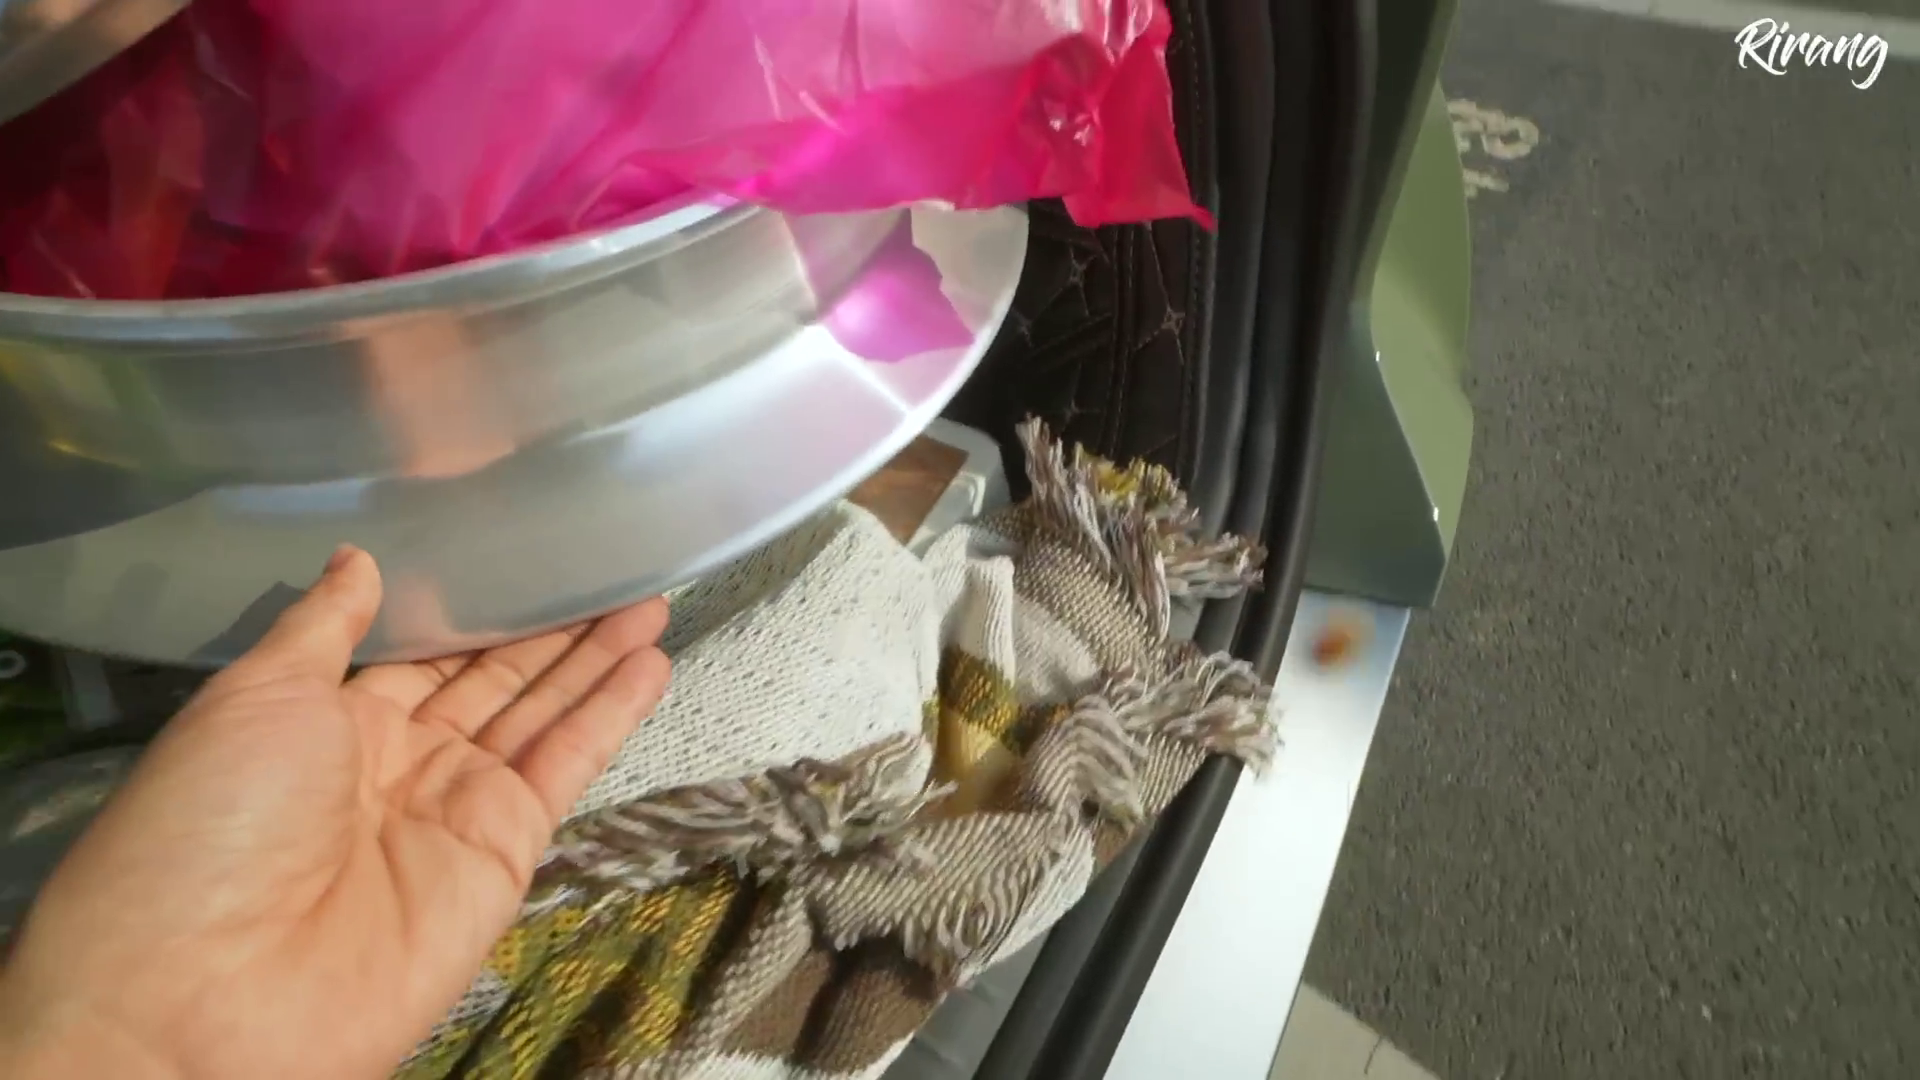

In [ ]:
for i in range(len(q6)):
  cv2_imshow(q6[i][0])
  print()

In [ ]:
q7 = q7[:100]
for i in range(len(q7)):
  cv2_imshow(q7[i][0])
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# input_data = np.array([test_img1,test_img2, test_img3, test_img4])
# input_data = [test_img1,test_img2, test_img3, test_img4]
# input_data = q[:5].tolist()
# background_img3 = input_data[0]
# background_img4 = input_data[len(input_data) // 2]
# background_img5 = input_data[-1]
# input_data_copy = q.copy()
# input_data.sort(reverse=True, key=lambda x:x[2])   # idx 1은 cps_score, idx 2는 frame_score, frame_score로 정렬
# cps_score : 부분 구간의 중요도 점수
# fps_score : 한 프레임의 중요도 점수

<ipython-input-120-899449013fbf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_data = np.array([test_img1,test_img2, test_img3, test_img4])


In [ ]:
# input_data_q = q1[16:].tolist()
# input_data = q1[:16].tolist()
# input_data_q = q5.tolist()
# input_data_q = q7[:100].tolist()
# input_data = q1[23:].tolist()
# input_data_q = q1.tolist()
# input_data = q7[:100].tolist()
# input_data_q = q7.tolist()

# input_data = q1[16:].tolist()
input_data = q8.tolist()
input_data = q9.tolist()


# input_data = []
# input_data.append(q1[0])
# input_data.append(q1[10])
# input_data.append(q1[11])
# input_data.append(q1[13])
# input_data.append(q1[17])
# input_data.append(q1[23])
# input_data.append(q1[27])


# input_data_q = q2.tolist()
# input_data = np.array([q3[2], q3[3], q3[7], q3[8], q3[9], q3[10]]).tolist()


step = 5


# input_data = []
# for i in range(0, len(input_data_q), step):
#     if i != len(input_data_q) // step * step:
#         tmp_list = input_data_q[i:i+step]
#     else:
#         tmp_list = input_data_q[i:]
    
#     tmp_list.sort(key=lambda x: x[2])
#     input_data.append(tmp_list[0])


original_height, original_width = input_data[0][0].shape[:2]
original_img_size = original_height * original_width

for i in input_data:
    if i[0].shape[1] > 1200:
        i[0] = cv2.resize(i[0], (None, None), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    elif i[0].shape[1] > 1000:
        i[0] = cv2.resize(i[0], (None, None), fx=0.7, fy=0.7, interpolation=cv2.INTER_AREA)


# pop() 하기
background_img2 = input_data[0][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 첫번째)
background_img3 = input_data[(len(input_data) // 2)][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 두번째)
background_img4 = input_data[-1][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 세번째)
background_img = [background_img2, background_img3, background_img4]


input_data.sort(key=lambda x:-x[2])   # idx 1은 cps_score, idx 2는 frame_score, frame_score로 정렬


background_img1 = input_data.pop(-1)[0]   # 세그먼트할 대상이 있는 경우 사용할 배경
# background_img2 = input_data.pop(0)[0]   # 세그먼트할 대상이 없을 경우 사용할 배경(1개 이미지)
tmp_height, tmp_width = input_data[0][0].shape[:2]
tmp_img_size = tmp_height * tmp_width

In [ ]:
for i in input_data:
    cv2_imshow(i[0])

In [4]:
def make_mask(outputs, input_data):
    img_num = len(outputs)
    tmp_dic = {}
    prior_label = [1, 18, 17]
    del_list = []
    real_dic = {}
    score_dic = {}
    proportion = 0.1
    proba_threshold = 0.2
    label_threshold = 0.9
    mask_img = []
    img_case = -1
    tmp_height, tmp_width = outputs[0]["masks"][0].shape[1:]
    

    for i in prior_label:
        real_dic[i] = -1

    for i in prior_label:
        tmp_dic[i] = []


    
    # boxes 버리고 각 이미지에서 레이블 중복되는 거 버림
    for i in range(len(outputs)):
        # del outputs[i]["boxes"]   ##
        outputs[i]["labels"] = outputs[i]["labels"].detach().numpy()
        outputs[i]["scores"] = outputs[i]["scores"].detach().numpy()
        outputs[i]["boxes"] = outputs[i]["boxes"].detach().numpy()
        outputs[i]["masks"] = torch.squeeze(outputs[i]["masks"], 1)
        outputs[i]["masks"] = outputs[i]["masks"].detach().numpy()
        del_idx = []

        for j in range(1, len(outputs[i]["labels"])):
            if outputs[i]["labels"][j] in outputs[i]["labels"][:j]:
                del_idx.append(j)


        outputs[i]["labels"] = np.delete(outputs[i]["labels"], del_idx)
        outputs[i]["scores"] = np.delete(outputs[i]["scores"], del_idx)
        outputs[i]["boxes"] = np.delete(outputs[i]["boxes"], del_idx, axis=0)
        outputs[i]["masks"] = outputs[i]["masks"].reshape(outputs[i]["masks"].shape[0], -1)
        outputs[i]["masks"] = np.delete(outputs[i]["masks"], del_idx, axis=0)


    # tmp_dic에 레이블당 score가 가장 높은 애들을 저장   ###
    for i in range(len(outputs)):
        for j in range(len(outputs[i]["labels"])):
            if outputs[i]["labels"][j] in prior_label:
                tmp_dic[outputs[i]["labels"][j]].append(outputs[i]["scores"][j])
                    

    for i in list(tmp_dic.keys()):
        del_list = []
        for j in tmp_dic[i]:
            if j < label_threshold:
                del_list.append(j)

        for d in del_list:
            tmp_dic[i].remove(d)

        tmp_dic[i].sort(reverse=True)
    
    

    if len(tmp_dic[1]) != 0:   # 사람 O
        if len(tmp_dic[18]) == 0 and len(tmp_dic[17]) == 0:   # 사람 O, 개나 고양이 X
            img_case = 1
            while len(tmp_dic[1]) > 3:
                tmp_dic[1].pop()
        else:   # 사람 O, 개나 고양이 O
            img_case = 2
            if len(tmp_dic[18]) != 0:
                tmp_dic[18] = [max(tmp_dic[18])]
            if len(tmp_dic[17]) != 0:
                tmp_dic[17] = [max(tmp_dic[17])]
            while len(tmp_dic[1]) > 2:
                tmp_dic[1].pop()

    else:   # 사람 X
        if len(tmp_dic[18]) == 0 and len(tmp_dic[17]) == 0:   # 사람 X, 개나 고양이 X
            img_case = 4
        else:   # 사람 X, 개나 고양이 O
            img_case = 3
            while len(tmp_dic[18]) > 2:
                tmp_dic[18].pop()
            while len(tmp_dic[17]) > 2:
                tmp_dic[17].pop()
            while len(tmp_dic[18] + tmp_dic[17]) > 2:
                min_tmp = min(tmp_dic[18] + tmp_dic[17])
                if min_tmp in tmp_dic[17]:
                    tmp_dic[17].remove(min_tmp)
                else:
                    tmp_dic[18].remove(min_tmp)


    # 레이블당 score가 가장 높은 애들을 제외하고 나머지는 삭제
    for i in range(len(outputs)):
        del_idx = []
        for j in range(len(outputs[i]["labels"])):
            if outputs[i]["labels"][j] in tmp_dic.keys():
                if outputs[i]["scores"][j] not in tmp_dic[outputs[i]["labels"][j]]:
                    del_idx.append(j)
            else:
                del_idx.append(j)
        outputs[i]["labels"] = np.delete(outputs[i]["labels"], del_idx)
        outputs[i]["scores"] = np.delete(outputs[i]["scores"], del_idx)
        outputs[i]["boxes"] = np.delete(outputs[i]["boxes"], del_idx, axis=0)
        outputs[i]["masks"] = np.delete(outputs[i]["masks"], del_idx, axis=0)
        outputs[i]["masks"] = outputs[i]["masks"].reshape(outputs[i]["masks"].shape[0], tmp_height, tmp_width)


    # 사용안 할 이미지는 리스트에서 삭제
    tmp_idx = []
    tmp_outputs = []
    tmp_input_data = []
    for i in range(len(outputs)):
        if len(outputs[i]["labels"]) != 0:
            tmp_idx.append(i)

    for i in tmp_idx:
        tmp_outputs.append(outputs[i])
        tmp_input_data.append(input_data[i][0].copy())

    outputs = tmp_outputs
    input_data_img = tmp_input_data
    

    for i in range(len(outputs)):
        for j in range(len(outputs[i]["labels"])):
            outputs[i]["masks"][j] = np.where(outputs[i]["masks"][j] < proba_threshold, 0, 255)
            dst = input_data_img[i].copy()
            dst = cv2.bitwise_and(dst, dst, mask=outputs[i]["masks"][j].astype("uint8"))
            mask_img.append(dst)

    result = [(a, b) for a, b in zip(outputs, mask_img)]
    result.sort(key=lambda x: (x[0]["labels"], ((x[0]["boxes"][0][2] - x[0]["boxes"][0][0]) / (x[0]["boxes"][0][3] - x[0]["boxes"][0][1]))))

    mask_img = [a[1] for a in result]

    
    return img_case, mask_img

In [5]:
def make_thumbnail_fg(img_case, mask_img):
    img_list = []
    mask_img_copy = mask_img
    tmp_height, tmp_width = mask_img[0].shape[:2]
    tmp_img_size = tmp_height * tmp_width

    for i in range(len(mask_img)):
        tmp = cv2.cvtColor(mask_img[i], cv2.COLOR_BGR2GRAY)
        _, tmp = cv2.threshold(tmp, 0.9, 255, cv2.THRESH_BINARY)

        cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)

        for j in range(1, cnt):
            (x, y, w, h, area) = stats[j]

            if area / tmp_img_size < 1 / 20:
                tmp[y:y+h, x:x+w] = 0
            
        a, b = cv2.findContours(tmp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        if len(a) != 0:
            cv2.drawContours(mask_img_copy[i], a, -1, (255, 255, 255), 11)
            tmp = cv2.bitwise_and(mask_img_copy[i], mask_img_copy[i], mask=tmp)
            img_list.append(tmp)
    

    if img_case == 1:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 0.9, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            (x, y, w, h, area) = stats[1]

            m = np.float32([[1, 0, -x], [0, 1, -y]])

            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))

            if i == 0:
                k = (tmp_height * 9) / (h * 10)
            else:
                k = (tmp_height * 7) / (h * 10)
        
            img_list[i] = cv2.resize(img_list[i], (None, None), fx=k, fy=k, interpolation=cv2.INTER_AREA) 

    elif img_case == 2:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 0.9, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            (x, y, w, h, area) = stats[1]
        
            m = np.float32([[1, 0, -x], [0, 1, -y]])

            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))

            if i == 0:
                k = (tmp_height * 9) / (h * 10)
                
            elif i == 1:
                k = (tmp_height * 7) / (h * 10)

            else:
                k = (tmp_height * 3) / (h * 10)
        
            img_list[i] = cv2.resize(img_list[i], (None, None), fx=k, fy=k, interpolation=cv2.INTER_AREA) 

    elif img_case == 3:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 0.9, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            (x, y, w, h, area) = stats[1]

            m = np.float32([[1, 0, -x], [0, 1, -y]])

            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))

            if i == 0:
                k = (tmp_height * 9) / (h * 10)
            else:
                k = (tmp_height * 7) / (h * 10)
            img_list[i] = cv2.resize(img_list[i], (None, None), fx=k, fy=k, interpolation=cv2.INTER_AREA) 

            
    for i in range(len(img_list)):
        bg = np.zeros((tmp_height, tmp_width, 3), dtype=np.uint8)

        if img_list[i].shape[0] > bg.shape[0]:
            bg[:bg.shape[0], :bg.shape[1]] = img_list[i][:bg.shape[0], :bg.shape[1]]
        else:
            bg[:img_list[i].shape[0], :img_list[i].shape[1]] = img_list[i]

        img_list[i] = bg


    if img_case == 1:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 1, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            centroids = centroids.astype(np.int64)
            (x, y, w, h, area) = stats[1]

            if i == 0:
                shift_x = (tmp_width - w) // 2
                shift_y = tmp_height - h

            elif i == 1:
                shift_x = tmp_width - w
                shift_y = tmp_height - h
            
            elif i == 2:
                shift_x = 0
                shift_y = tmp_height - h
                
            m = np.float32([[1, 0, int(shift_x)], [0, 1, int(shift_y)]])
            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))
    
    elif img_case == 2:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 1, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            centroids = centroids.astype(np.int64)
            (x, y, w, h, area) = stats[1]

            if i == 0:
                shift_x = 0
                shift_y = tmp_height - h

            elif i == 1:
                shift_x = tmp_width - w
                shift_y = tmp_height - h
            
            elif i == 2:
                shift_x = tmp_width / 2 - w
                shift_y = 20

            else:
                shift_x = tmp_width - w
                shift_y = 20
                
            m = np.float32([[1, 0, int(shift_x)], [0, 1, int(shift_y)]])
            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))
    
    elif img_case == 3:
        for i in range(len(img_list)):
            tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
            _, tmp = cv2.threshold(tmp, 1, 255, cv2.THRESH_BINARY)

            cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(tmp)
            centroids = centroids.astype(np.int64)
            (x, y, w, h, area) = stats[1]

            if i == 0:
                shift_x = 0
                shift_y = tmp_height - h

            else:
                shift_x = tmp_width - w
                # shift_y = 30
                shift_y = tmp_height - h
            
                
            m = np.float32([[1, 0, int(shift_x)], [0, 1, int(shift_y)]])
            img_list[i] = cv2.warpAffine(img_list[i], m, (0, 0))

    
    dst1 = np.zeros((tmp_height, tmp_width, 3), np.uint8)

    for i in img_list[::-1]:
        # dst2 = cv2.add(dst2, i)
        # dst2 = cv2.bitwise_or(dst2, i)

        gray_tmp = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray_tmp, 0.1, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)

        masked_fg = cv2.bitwise_and(i, i, mask=mask)
        masked_bg = cv2.bitwise_and(dst1, dst1, mask=mask_inv)

        dst1 = masked_fg + masked_bg

    return dst1

In [6]:
def make_thumbnail_bg1(dst1, bg_image, bg_c="sky", text_f="base", text_c="black",text="VLOG", font_scale=2, font_thickness=2):
    tmp_height, tmp_width = dst1.shape[:2]
    bg_color = {"sky": cv2.merge([np.full((tmp_height, tmp_width), 255, np.uint8), np.full((tmp_height, tmp_width), 204, np.uint8), np.full((tmp_height, tmp_width), 153, np.uint8)]),
            "pink": cv2.merge([np.full((tmp_height, tmp_width), 255, np.uint8), np.full((tmp_height, tmp_width), 51, np.uint8), np.full((tmp_height, tmp_width), 255, np.uint8)]),
            "red": cv2.merge([np.full((tmp_height, tmp_width), 0, np.uint8), np.full((tmp_height, tmp_width), 0, np.uint8), np.full((tmp_height, tmp_width), 255, np.uint8)]),
            }
    text_color = {"black": (0, 0, 0), "red": (0, 0, 255), "blue": (255, 0, 0), "green": (0, 255, 0), "white": (255, 255, 255)}
    text_font = {"SIMPLEX": cv2.FONT_HERSHEY_SIMPLEX, "TRIPLEX": cv2.FONT_HERSHEY_TRIPLEX, "ITALIC": cv2.FONT_ITALIC, "base": cv2.FONT_HERSHEY_TRIPLEX | cv2.FONT_ITALIC}
    
    
    if bg_image is not None:
        dst2 = bg_image
    else:
        dst2 = bg_color[bg_c]


    text_size = cv2.getTextSize(text, text_font[text_f], font_scale, font_thickness)[0]
    text_x = int((dst2.shape[1] - text_size[0]) / 2)
    text_y = int((dst2.shape[0] - text_size[1]) / 4 * 3)
    dst1_gray = cv2.cvtColor(dst1, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(dst1_gray, 0.1, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    masked_fg = cv2.bitwise_and(dst1, dst1, mask=mask)
    masked_bg = cv2.bitwise_and(dst2, dst2, mask=mask_inv)
    dst = masked_fg + masked_bg
    # dst = dst2 + masked_bg

    cv2.putText(dst, text, (text_x, text_y), text_font[text_f], font_scale, text_color[text_c], font_thickness)

    return dst

In [7]:
def make_thumbnail_bg2():
    background_img_list = []
    tt = torchvision.transforms.ToTensor()
    
    for i in range(len(background_img)):
        background_img_list.append(tt(background_img[i]))

    torch_bg_list = [transform(tmp) for tmp in background_img_list]

    with torch.no_grad():
        background_output = model(torch_bg_list)


    ####################

    tmp_dic = {}
    prior_label = [1, 18, 17]
    del_list = []
    real_dic = {}
    score_dic = {}
    proportion = 0.1
    proba_threshold = 0.2
    label_threshold = 0.9
    mask_img = []
    img_case = -1

    bg = np.zeros((tmp_height, tmp_width, 3), np.uint8)
    tmp_img_width = int(tmp_width / 6)


    
    # boxes 버리고 각 이미지에서 레이블 중복되는 거 버림
    for i in range(len(background_output)):
        background_output[i]["labels"] = background_output[i]["labels"].detach().numpy()[0]
        background_output[i]["scores"] = background_output[i]["scores"].detach().numpy()[0]
        background_output[i]["boxes"] = background_output[i]["boxes"].detach().numpy()[0].astype("uint16")
        background_output[i]["masks"] = torch.squeeze(background_output[i]["masks"], 1)
        background_output[i]["masks"] = background_output[i]["masks"].detach().numpy()[0]


    # 단순 출력용도
    # for i in range(len(background_output)):
    #     print(i)
    #     print(background_output[i]["labels"])
    #     print(background_output[i]["scores"])
    #     print(background_output[i]["boxes"])
    #     print(background_output[i]["boxes"].dtype)
    #     print()    
    # print()
    # print()

    bg[:, background_output[0]["boxes"][0]:background_output[0]["boxes"][2]] = background_img[0][:, background_output[0]["boxes"][0]:background_output[0]["boxes"][2]]


    return bg




In [8]:
def qwe(input_img):
    input_data = input_img
    step = 5
    original_height, original_width = input_data[0][0].shape[:2]
    original_img_size = original_height * original_width

    for i in input_data:
        if i[0].shape[1] > 1200:
            i[0] = cv2.resize(i[0], (None, None), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        elif i[0].shape[1] > 1000:
            i[0] = cv2.resize(i[0], (None, None), fx=0.7, fy=0.7, interpolation=cv2.INTER_AREA)

    background_img2 = input_data[0][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 첫번째)
    background_img3 = input_data[(len(input_data) // 2)][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 두번째)
    background_img4 = input_data[-1][0]   # 세그먼트할 대상이 없을 경우 사용할 배경(3개 이미지중 세번째)
    background_img = [background_img2, background_img3, background_img4]

    input_data.sort(key=lambda x:-x[2])   # idx 1은 cps_score, idx 2는 frame_score, frame_score로 정렬

    background_img1 = input_data.pop(-1)[0]   # 세그먼트할 대상이 있는 경우 사용할 배경
    # background_img2 = input_data.pop(0)[0]   # 세그먼트할 대상이 없을 경우 사용할 배경(1개 이미지)
    # tmp_height, tmp_width = input_data[0][0].shape[:2]
    # tmp_img_size = tmp_height * tmp_width

    weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
    transform = weights.transforms()

    model = maskrcnn_resnet50_fpn(weights=weights)
    model = model.eval()

    input_img_list = []
    tt = torchvision.transforms.ToTensor()

    for i in range(len(input_data)):
        input_img_list.append(tt(input_data[i][0]))

    torch_img_list = [transform(tmp) for tmp in input_img_list]
    output_tmp = []
    outputs = []

    with torch.no_grad():
        for i in range(0, len(torch_img_list), step):
            if i != len(torch_img_list) // step * step:
                output_tmp = model(torch_img_list[i:i+step])
            else:
                output_tmp = model(torch_img_list[i:])
            
            outputs.append(output_tmp)

    outputs = sum(outputs, [])

    tmp_outputs = []
    tmp_input_data = []

    for i in range(len(outputs)):
        if len(outputs[i]["labels"]) != 0:
            tmp_outputs.append(outputs[i])
            tmp_input_data.append(input_data[i])

    outputs = tmp_outputs
    input_data = tmp_input_data

    img_case, mask_img = make_mask(outputs, input_data)

    if img_case != 4:
        dst1 = make_thumbnail_fg(img_case, mask_img)
        dst2 = make_thumbnail_bg1(dst1, bg_image=background_img1, bg_c="sky", text_f="base", text_c="white", text="InYoung's VLOG", font_scale=2, font_thickness=2)
    else:
        dst2 = make_thumbnail_bg2()   # 여기 구현해야됨

    return dst2

In [9]:
dst2 = qwe(q9.tolist())

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

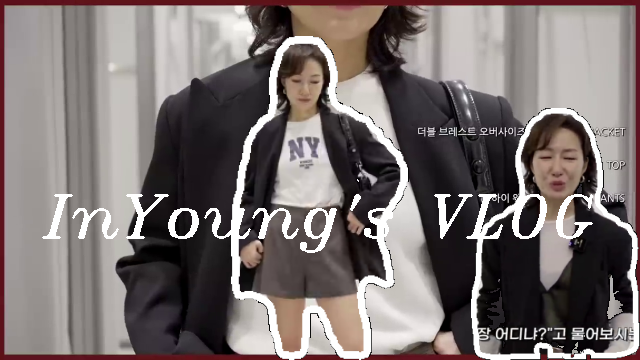

In [10]:
cv2_imshow(dst2)

In [ ]:
cv2.imwrite("/content/gdrive/MyDrive/Colab Notebooks/SKT_FLY_AI/project/image/vlog_result1.jpg", dst2)

True

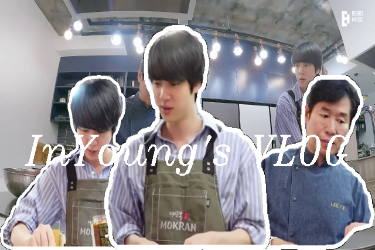

In [ ]:
dst = cv2.resize(dst2, (375, 250))
cv2_imshow(dst)